 Calculate the first two principal components of the Scikit-learn / UCI ML
 repository Wine Dataset using Scikit’s PCA algorithm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
#!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Aeberhard, S. & Forina, M. (1992). Wine [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# construct a dataframe using pandas
df1=pd.DataFrame(wine.data.features,columns=wine.data.features.columns)

# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)

principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

(178, 2)


 What is the explained variance ratio of the first two principal components?

In [ ]:
print(principal.explained_variance_ratio_)

[0.36198848 0.1920749 ]


 Use the first two principal components to train a SVM classifier to classify the wines into three classes. Use a 60%-40% split for the train set and the test set.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(
    x,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True)

from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(x_test) )
print('accuracy score :', acc)

accuracy score : 0.9444444444444444


 Compare the accuracy, precision and recall of the SVM classifier with
 that of a decision tree classifier that classifies the wines in to three classes using
 the original features. Use the same 60%-40% split for the train set and the test set
 for the decision tree classifier and use max_depth=3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth =3)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,rf_clf.predict(x_test) )
print('accuracy score :', acc)

accuracy score : 0.9444444444444444


[Text(0.4230769230769231, 0.875, 'x[1] <= -0.351\ngini = 0.643\nsamples = 106\nvalue = [35, 47, 24]'),
 Text(0.15384615384615385, 0.625, 'x[1] <= -0.77\ngini = 0.043\nsamples = 45\nvalue = [1, 44, 0]'),
 Text(0.28846153846153844, 0.75, 'True  '),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.23076923076923078, 0.375, 'x[0] <= 1.201\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= -0.175\ngini = 0.532\nsamples = 61\nvalue = [34, 3, 24]'),
 Text(0.5576923076923077, 0.75, '  False'),
 Text(0.5384615384615384, 0.375, 'x[1] <= 0.088\ngini = 0.142\nsamples = 26\nvalue = [0, 2, 24]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]'),
 T

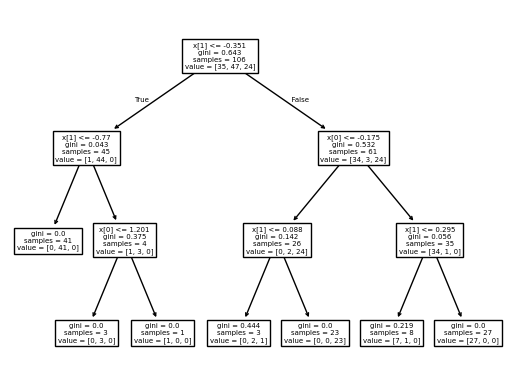

In [ ]:
from sklearn import tree
tree.plot_tree(dt_clf)